In [20]:
from utils import *
import os
import random
import pickle
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras import Model

In [21]:
data_path = "/Users/hwang_1/Documents/scripts/python/ml/scripts/projects/brain_tumor/data"
images_dir = "images"
image_path = os.path.join(data_path,images_dir)

In [22]:
train_dir = os.path.join(image_path, "train")
test_dir = os.path.join(image_path, "test") 
val_dir = os.path.join(image_path, "val")
train_pos_dir = os.path.join(train_dir, "1")  ##positive image folder
train_neg_dir = os.path.join(train_dir, "0")  ##negative image folder
val_pos_dir = os.path.join(val_dir, "1")
val_neg_dir = os.path.join(val_dir, "0")
test_pos_dir = os.path.join(test_dir, "1")
test_neg_dir = os.path.join(test_dir, "0")

In [23]:
##generate a dataset from the images folder
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                           image_size=(240,240),
                                                           labels="inferred",
                                                           class_names=None,
                                                           label_mode="binary",
                                                           color_mode='grayscale',
                                                           shuffle=True,
                                                           batch_size=32)

Found 3386 files belonging to 2 classes.


In [24]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=val_dir,
                                                           image_size=(240,240),
                                                           labels="inferred",
                                                           class_names=None,
                                                           label_mode="binary",
                                                           color_mode='grayscale',
                                                           batch_size=32)

Found 188 files belonging to 2 classes.


In [25]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                           image_size=(240,240),
                                                           labels="inferred",
                                                           class_names=None,
                                                           label_mode="binary",
                                                           color_mode='grayscale',
                                                           shuffle=True,
                                                           batch_size=32)

Found 188 files belonging to 2 classes.


In [26]:
def normalize(image,label):
    image = tf.cast(image/255.,tf.float16)
    label = tf.cast(label,tf.float16)
    return image,label

In [27]:
train_data = train_data.map(normalize)

In [28]:
val_data = val_data.map(normalize)

In [29]:
test_data = test_data.map(normalize)

In [30]:
train_data

<MapDataset element_spec=(TensorSpec(shape=(None, 240, 240, 1), dtype=tf.float16, name=None), TensorSpec(shape=(None, 1), dtype=tf.float16, name=None))>

In [31]:
len(train_data)

106

In [32]:
input = Input(shape=(240, 240, 1))

**Conv2D**
- filters: Number of filters

- kernel_size: filter matrix size, 3x3 in this example

- padding="same": output will keep the same size of the input 

In [33]:
##Build a small CCN model
x = Conv2D(filters=16, kernel_size=3, padding="same", activation="relu")(input)
x = MaxPool2D(pool_size=2, strides=2)(x)                         
x = Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Flatten()(x)
x = Dense(4096, activation="relu")(x)

output = Dense(units=1, activation="sigmoid")(x)

In [34]:
model_cnn = Model(inputs=input, outputs=output)
model_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 240, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 240, 240, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496 

In [35]:
model_cnn.compile(loss="binary_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

In [36]:
history_model_cnn = model_cnn.fit(train_data,
               epochs = 30,
               steps_per_epoch = int(len(train_data)),
               validation_data = test_data,
               validation_steps = int(len(test_data))
               )

Epoch 1/30


2023-10-28 21:19:33.438683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


106/106 [==============================] - ETA: 0s - loss: 0.4266 - accuracy: 0.8151

2023-10-28 21:19:43.030433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


106/106 [==============================] - 10s 84ms/step - loss: 0.4266 - accuracy: 0.8151 - val_loss: 0.3172 - val_accuracy: 0.8883
Epoch 2/30
106/106 [==============================] - 9s 83ms/step - loss: 0.2463 - accuracy: 0.9011 - val_loss: 0.2588 - val_accuracy: 0.8830
Epoch 3/30
106/106 [==============================] - 9s 83ms/step - loss: 0.1754 - accuracy: 0.9341 - val_loss: 0.3076 - val_accuracy: 0.8883
Epoch 4/30
106/106 [==============================] - 9s 83ms/step - loss: 0.1219 - accuracy: 0.9527 - val_loss: 0.2660 - val_accuracy: 0.9149
Epoch 5/30
106/106 [==============================] - 9s 83ms/step - loss: 0.0822 - accuracy: 0.9657 - val_loss: 0.1746 - val_accuracy: 0.9415
Epoch 6/30
106/106 [==============================] - 9s 83ms/step - loss: 0.0805 - accuracy: 0.9714 - val_loss: 0.2318 - val_accuracy: 0.9415
Epoch 7/30
106/106 [==============================] - 9s 84ms/step - loss: 0.0310 - accuracy: 0.9891 - val_loss: 0.3149 - val_accuracy: 0.9362
Epoch 8/3

In [ ]:
##save the model
model_cnn.save("model_cnn.h5")

In [12]:
##load saved model
model_cnn_2 = tf.keras.models.load_model("model_cnn.h5")

In [13]:
model_cnn_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 1)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 240, 240, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 120, 120, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 120, 120, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        1849

In [14]:
model_cnn_2.evaluate(test_data)

2023-10-27 14:04:28.424416: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-10-27 14:04:28.502557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 1s 27ms/step - loss: 0.1847 - accuracy: 0.9707


[0.18467570841312408, 0.9707447290420532]

In [16]:
##save history
import pickle
history_model_cnn_path = "history/model_cnn"

In [23]:
with open(history_model_cnn_path, 'wb') as file_open:
    pickle.dump(history_model_cnn, file_open)

INFO:tensorflow:Assets written to: ram://6740022f-8970-4a7a-aa38-d39fc5f2601a/assets


INFO:tensorflow:Assets written to: ram://6740022f-8970-4a7a-aa38-d39fc5f2601a/assets


In [17]:
##load history
history_model_cnn_2 = pickle.load(open(history_model_cnn_path, "rb"))

In [18]:
history_model_cnn_2.history

{'loss': [0.5636886954307556,
  0.30959266424179077,
  0.22723601758480072,
  0.18214790523052216,
  0.11397663503885269,
  0.07264517992734909,
  0.05304809659719467,
  0.0296527948230505,
  0.03708064183592796,
  0.026768898591399193,
  0.020266588777303696,
  0.016814665868878365,
  0.010144289582967758,
  0.011159898713231087,
  0.013270119205117226,
  0.009322844445705414,
  0.010775423608720303,
  0.005861136596649885,
  0.0035027579870074987,
  0.016089145094156265,
  0.008641881868243217,
  0.00680790189653635,
  0.014004693366587162,
  0.01698734611272812,
  0.006882610730826855],
 'accuracy': [0.7829297184944153,
  0.876550555229187,
  0.9093325734138489,
  0.9308919310569763,
  0.9580626487731934,
  0.9722386598587036,
  0.9837566614151001,
  0.9899587035179138,
  0.9873006939888,
  0.9911400079727173,
  0.9914353489875793,
  0.993798017501831,
  0.997046709060669,
  0.9967513680458069,
  0.997046709060669,
  0.997046709060669,
  0.9961606860160828,
  0.9976373910903931,
  0

In [19]:
def plot_graph(history):
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    
    val_accuracy = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    epochs = range(0, len(history.history['loss']))
    
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, val_accuracy, label="validation_accuracy")
    plt.title = 'Accuracy'
    plt.xlabel = 'Epochs'
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, val_loss, label="validation_loss")
    plt.title = "Loss"
    plt.xlabel = "Epochs"
    plt.legend()

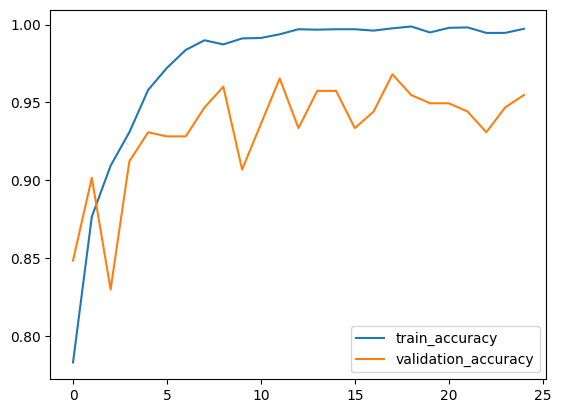

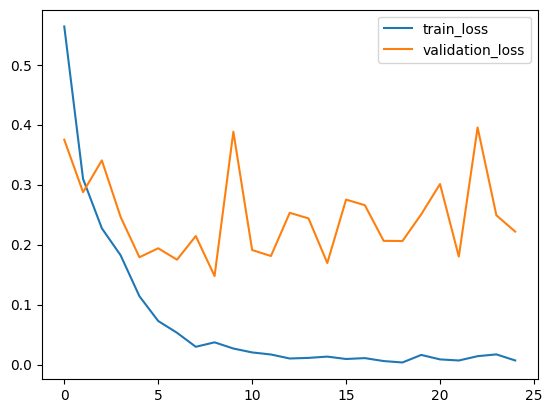

In [27]:
plot_graph(history_model_cnn)